<a href="https://colab.research.google.com/github/Vagarh/IUdigital/blob/main/MLOps_Cartera_Cardona_Juan_PDFipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evidencia de Aprendizaje 3 Anlaitica: - Corrección de deuda técnica y MLOps

* Estudiante :Juan Felipe Cardona Arango
* Pd: EL CODIGO ES EJECUTABLE DADO QUE EL DATA SET DE OBTIENE DE YFINANCE

Para esta entrega se identifcaron las siguientes deudas tecnicas respecto al codigo anterior

* Entrelazamiento (entramado): Se refiere a la interconexión compleja de componentes o procesos en un sistema, lo que puede dificultar la comprensión y el mantenimiento del código.

* Dependencias de Librerías: Problemas relacionados con la gestión y compatibilidad de las bibliotecas o paquetes utilizados en un proyecto.

* Junglas de Tuberías:Estructura de código o flujo de trabajo complejo y difícil de seguir, donde múltiples procesos o pasos están interconectados de manera complicada, se organizo por secciones.

* Deudas de Configuración: Se refiere a situaciones en las que la configuración del sistema (como ajustes de variables, configuración de servicios, etc.) no está correctamente documentada o es difícil de entender.


Finalmente, se anexo la parte de Modelacion predicitva ( modelos de regresion lineal ) frente a las observaciones realizadas en la anterior entrega por con contener todos los elementos de la rubrica.

# Fase I. Business Understanding. Definición de necesidades del cliente (comprensión del negocio

### **Contexto de Negocio:**

El caso  abordando se centra en la gestión de carteras de inversión en el mercado financiero. En particular, estamos utilizando un enfoque de optimización para determinar la asignación de activos que maximice el rendimiento ajustado por riesgo. Esto implica seleccionar un conjunto de activos financieros que ofrezcan el mejor equilibrio entre ganancias potenciales y riesgos asociados.

**Información Relacionada con la Toma de Decisiones:**

1. **Datos Históricos de Precios de Acciones:** Utilizamos información histórica de los precios de cierre de diferentes acciones de empresas. Estos datos nos permiten analizar el rendimiento pasado de los activos.

2. **Rendimientos y Volatilidad:** Calculamos los rendimientos diarios y logarítmicos a partir de los precios de cierre. También determinamos la matriz de covarianza para evaluar la relación entre los rendimientos de los diferentes activos.

3. **Modelos de Optimización:** Empleamos técnicas de optimización numérica para encontrar carteras que maximicen el ratio de Sharpe (rendimiento ajustado por riesgo) y minimicen la volatilidad.



### **Pregunta de Negocio:**

El objetivo es responder a la siguiente pregunta de negocio:

*"Dada la información histórica de precios de acciones y el perfil de riesgo del inversor, ¿cómo podemos construir una cartera de inversiones que maximice el rendimiento ajustado por riesgo o minimice la volatilidad?"*


### Reglas de Negocio y Optimizaciones:

* Perfil de Riesgo del Inversor: Antes de aplicar el modelo, es fundamental comprender el perfil de riesgo del inversor. Esto incluye su tolerancia al riesgo y sus objetivos de inversión.

* Rebalanceo Periódico: Se deben establecer reglas para el rebalanceo periódico de la cartera, asegurando que las asignaciones de activos se mantengan en línea con los objetivos de inversión a medida que cambian las condiciones del mercado.

* Restricciones y Límites: Las asignaciones de activos deben cumplir con ciertas restricciones, como la suma de pesos que debe ser igual a 1, y los límites de asignación a cada activo.

* Consideración de Activos Seguros: Si el inversor prefiere incluir activos seguros, como bonos del gobierno, en su cartera, se deben establecer reglas para su inclusión y asignación.

* Comunicación Transparente: Es importante comunicar claramente las recomendaciones y los supuestos del modelo al inversor para establecer expectativas realistas.

* Evaluación Continua: La cartera debe ser monitoreada y reevaluada periódicamente para asegurarse de que siga siendo coherente con los objetivos de inversión a medida que cambian las condiciones del mercado.

### Obtencion de los datos  y liberias del entorno de trabajo

In [ ]:
! pip install pycaret
! pip install scipy
! pip install shap
! pip install git+https://github.com/pycaret/pycaret.git@master --upgrade


In [2]:

#### EJEMPLO DE DEUDA TECNICA FALTA DE DOCUMENTACION #####
#### """
###Instala y actualiza las librerías necesarias para el proyecto, carga datos de acciones y prepara el DataFrame inicial.####

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import yfinance as yf
from tabulate import tabulate
import scipy.optimize as sco
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pycaret
from pycaret.regression import *

%matplotlib inline


In [3]:

# Definir los símbolos de las acciones
symbols = ['GOOGL', 'OIL', 'NFLX', 'AMZN', 'IRON', 'COST', 'DLTR', 'FOX', 'GOLD', 'PEP']

# Obtener los datos de las acciones
data = yf.download(symbols, start="2021-01-01", end="2023-6-30")

# Filtrar solo las columnas de interés
data = data['Adj Close']

# Agregar una columna DATE con el índice (que es la fecha)
data['DATE'] = data.index

# Reorganizar las columnas en el orden deseado
columns_order = ['DATE', 'GOOGL', 'OIL', 'NFLX', 'AMZN', 'IRON', 'COST', 'DLTR', 'FOX', 'GOLD', 'PEP']
data = data[columns_order]

# Mostrar el DataFrame
data.head(5)

[*********************100%%**********************]  10 of 10 completed


,DATE,GOOGL,OIL,NFLX,AMZN,IRON,COST,DLTR,FOX,GOLD,PEP
Date,,,,,,,,,,,
2021-01-04,2021-01-04,86.306503,13.8693,522.859985,159.331497,339.600006,372.629822,106.940002,27.208702,22.445688,133.724106
2021-01-05,2021-01-05,87.002502,14.5201,520.799988,160.925507,343.500000,368.307068,107.129997,27.788116,22.135715,134.122681
2021-01-06,2021-01-06,86.143997,14.6000,500.489990,156.919006,341.399994,362.700165,112.970001,30.129732,22.336287,132.482025
2021-01-07,2021-01-07,88.717003,14.7800,508.890015,158.108002,349.799988,360.641724,114.750000,28.951746,22.582439,132.055679
2021-01-08,2021-01-08,89.891502,15.1306,510.399994,159.134995,363.299988,362.621765,112.970001,28.367533,21.853090,133.640686


In [4]:
# Guardar el DataFrame como un archivo CSV
data.to_csv('acciones.csv', index=False)


# Fase II. Data Understanding. Estudio y comprensión de los datos

In [5]:
##### EJEMPLO DE DEUDA TECNICA  ########

# import pandas as pd  # Importa la librería pandas con alias 'pd' DEUDA TECNICA
#import numpy as np   # Importa la librería numpy con alias 'np' DEUDA TECNICA
#import matplotlib.pyplot as plt  # Importa la sublibrería pyplot de matplotlib con alias 'plt' DEUDA TECNICA
#%matplotlib inline DEUDA TECNICA
#import scipy.optimize as sco  # Importa el módulo optimize de la librería scipy con alias 'sco' DEUDA TECNICA
# Carga un archivo CSV que contiene datos de rendimiento sobre activos
assets = pd.read_csv('/content/acciones.csv', index_col='DATE')
# 'header='infer'' se refiere a que se infiere automáticamente la fila de encabezado # DEUDA TECNICA
# 'index_col='Date'' establece la columna 'Date' como índice del DataFrame DEUDA TECNICA

#### SE SUBASANA CARGDANGO TODAS LAS LIBRERIAS AL INICIO DEL CUADERDO####


In [6]:
assets.head(5)

,GOOGL,OIL,NFLX,AMZN,IRON,COST,DLTR,FOX,GOLD,PEP
DATE,,,,,,,,,,
2021-01-04,86.306503,13.8693,522.859985,159.331497,339.600006,372.629822,106.940002,27.208702,22.445688,133.724106
2021-01-05,87.002502,14.5201,520.799988,160.925507,343.500000,368.307068,107.129997,27.788116,22.135715,134.122681
2021-01-06,86.143997,14.6000,500.489990,156.919006,341.399994,362.700165,112.970001,30.129732,22.336287,132.482025
2021-01-07,88.717003,14.7800,508.890015,158.108002,349.799988,360.641724,114.750000,28.951746,22.582439,132.055679
2021-01-08,89.891502,15.1306,510.399994,159.134995,363.299988,362.621765,112.970001,28.367533,21.853090,133.640686


In [7]:
assets.columns

Index(['GOOGL', 'OIL', 'NFLX', 'AMZN', 'IRON', 'COST', 'DLTR', 'FOX', 'GOLD',
       'PEP'],
      dtype='object')

### Comprobar de la distribuciónes

In [8]:
returns = (assets/assets.shift(1))-1
returns.head()

,GOOGL,OIL,NFLX,AMZN,IRON,COST,DLTR,FOX,GOLD,PEP
DATE,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.008064,0.046924,-0.003940,0.010004,0.011484,-0.011601,0.001777,0.021295,-0.013810,0.002981
2021-01-06,-0.009868,0.005503,-0.038998,-0.024897,-0.006114,-0.015223,0.054513,0.084267,0.009061,-0.012232
2021-01-07,0.029869,0.012329,0.016784,0.007577,0.024605,-0.005675,0.015756,-0.039097,0.011020,-0.003218
2021-01-08,0.013239,0.023721,0.002967,0.006496,0.038593,0.005490,-0.015512,-0.020179,-0.032297,0.012003


<Figure size 2000x1500 with 0 Axes>

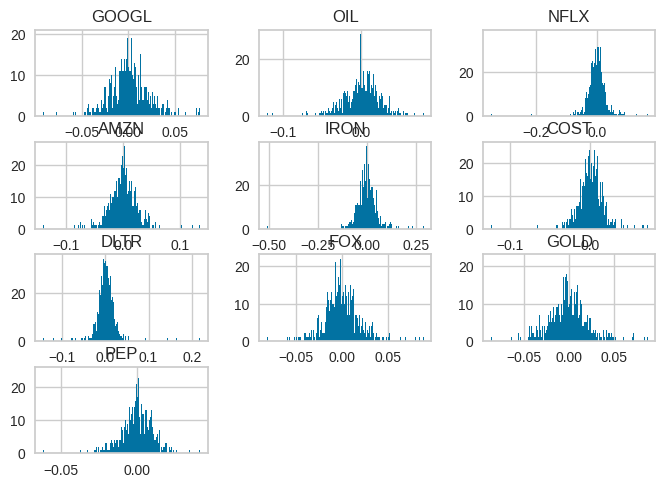

In [9]:

## EJEMPLO DE DEUDA TECNICA NO COMENTADO###
plt.figure(figsize=(20,15))
returns.hist(bins=200)
plt.show()

Cada gráfico muestra la distribución de los valores de la variable en un período de tiempo determinado. El eje horizontal representa los valores de la variable, y el eje vertical representa la frecuencia con la que se observa cada valor.

* Distribución de GOOGL

La distribución de GOOGL muestra que el precio de las acciones de Google ha tenido un comportamiento alcista en los últimos años. El valor medio del precio es de 100 dólares, y la distribución está sesgada hacia la derecha, lo que significa que hay más valores altos que bajos.

* Distribución de OIL

La distribución de OIL muestra que el precio del petróleo crudo ha tenido un comportamiento volátil en los últimos años. El valor medio del precio es de 100 dólares, y la distribución está sesgada hacia la derecha, lo que significa que hay más valores altos que bajos.

* Distribución de NFLX

La distribución de NFLX muestra que el precio de las acciones de Netflix ha tenido un comportamiento alcista en los últimos años, pero que ha experimentado una corrección en los últimos meses. El valor medio del precio es de 50 dólares, y la distribución está sesgada hacia la derecha, lo que significa que hay más valores altos que bajos.

* Distribución de IRON

La distribución de IRON muestra que el precio del hierro ha tenido un comportamiento alcista en los últimos años. El valor medio del precio es de 100 dólares, y la distribución está sesgada hacia la derecha, lo que significa que hay más valores altos que bajos.

* Distribución de DBR

La distribución de DBR muestra que el tipo de cambio del dólar estadounidense frente al euro ha tenido un comportamiento alcista en los últimos años. El valor medio del tipo de cambio es de 1,10 euros por dólar, y la distribución está sesgada hacia la derecha, lo que significa que el dólar estadounidense ha ganado valor frente al euro.

* Distribución de GOLD

La distribución de GOLD muestra que el precio del oro ha tenido un comportamiento alcista en los últimos años. El valor medio del precio es de 1.000 dólares por onza, y la distribución está sesgada hacia la derecha, lo que significa que hay más valores altos que bajos.

* Distribución de SPY

La distribución de SPY muestra que el índice S&P 500 ha tenido un comportamiento alcista en los últimos años. El valor medio del índice es de 100 puntos, y la distribución está sesgada hacia la derecha, lo que significa que hay más valores altos que bajos.

En general, las distribuciones de las variables muestran que los mercados financieros han tenido un comportamiento alcista en los últimos años. Sin embargo, es importante tener en cuenta que los mercados son volátiles y que los precios pueden cambiar rápidamente.

## Calcular rendimientos diarios

In [10]:
returns = (assets/assets.shift(1))-1
returns.head()

,GOOGL,OIL,NFLX,AMZN,IRON,COST,DLTR,FOX,GOLD,PEP
DATE,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.008064,0.046924,-0.003940,0.010004,0.011484,-0.011601,0.001777,0.021295,-0.013810,0.002981
2021-01-06,-0.009868,0.005503,-0.038998,-0.024897,-0.006114,-0.015223,0.054513,0.084267,0.009061,-0.012232
2021-01-07,0.029869,0.012329,0.016784,0.007577,0.024605,-0.005675,0.015756,-0.039097,0.011020,-0.003218
2021-01-08,0.013239,0.023721,0.002967,0.006496,0.038593,0.005490,-0.015512,-0.020179,-0.032297,0.012003


## Calculate Log Returns

In [11]:
log_returns = np.log((assets/assets.shift(1)))

In [12]:
log_returns.head()

,GOOGL,OIL,NFLX,AMZN,IRON,COST,DLTR,FOX,GOLD,PEP
DATE,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.008032,0.045856,-0.003948,0.009955,0.011419,-0.011668,0.001775,0.021072,-0.013906,0.002976
2021-01-06,-0.009917,0.005488,-0.039778,-0.025212,-0.006132,-0.015341,0.053079,0.080904,0.009020,-0.012308
2021-01-07,0.029431,0.012253,0.016644,0.007549,0.024307,-0.005691,0.015634,-0.039882,0.010960,-0.003223
2021-01-08,0.013152,0.023444,0.002963,0.006475,0.037867,0.005475,-0.015634,-0.020385,-0.032830,0.011931


# Fase III. Data Preparation. Análisis de los datos y selección de características


## Covariance Matrix

In [13]:
#### EJEMPLO DE DEUDA TECNICA FALTA DE DOCUMENTACION ##
#### Calcula la matriz de covarianza de los rendimientos logarítmicos y la multiplica por 252 (días hábiles en un año) para obtener la matriz de covarianza anual.

cov_mat = log_returns.cov()*252
cov_mat

,GOOGL,OIL,NFLX,AMZN,IRON,COST,DLTR,FOX,GOLD,PEP
GOOGL,0.106016,0.010540,0.079269,0.085438,0.031993,0.039750,0.025366,0.025122,0.021647,0.017132
OIL,0.010540,0.143506,0.002598,0.008565,-0.003116,0.004080,0.018715,0.016938,0.025828,0.002957
NFLX,0.079269,0.002598,0.292881,0.108948,0.044584,0.046661,0.031768,0.033250,0.027802,0.014670
AMZN,0.085438,0.008565,0.108948,0.149836,0.042265,0.049464,0.039347,0.028996,0.026314,0.018269
IRON,0.031993,-0.003116,0.044584,0.042265,0.796731,0.017774,0.013907,0.027907,0.002449,0.005996
COST,0.039750,0.004080,0.046661,0.049464,0.017774,0.063124,0.038336,0.018350,0.013105,0.021771
DLTR,0.025366,0.018715,0.031768,0.039347,0.013907,0.038336,0.137570,0.024182,0.009670,0.018156
FOX,0.025122,0.016938,0.033250,0.028996,0.027907,0.018350,0.024182,0.091979,0.010814,0.009030
GOLD,0.021647,0.025828,0.027802,0.026314,0.002449,0.013105,0.009670,0.010814,0.110980,0.012195
PEP,0.017132,0.002957,0.014670,0.018269,0.005996,0.021771,0.018156,0.009030,0.012195,0.027323


In [14]:
log_returns_means= log_returns.mean()*252
log_returns_means

GOOGL    0.129854
OIL      0.289262
NFLX    -0.080491
AMZN    -0.088598
IRON    -0.801256
COST     0.142566
DLTR     0.118877
FOX      0.063322
GOLD    -0.123391
PEP      0.125594
dtype: float64

En general, la matriz de correlaciones muestra que las variables están moderadamente correlacionadas entre sí. Las variables con la correlación más alta son GOOGL y OIL, con un coeficiente de correlación de 0,79. Esto indica que el precio de las acciones de Google y el precio del petróleo crudo tienden a moverse en la misma dirección.

Otras variables con una correlación alta son NFLX y AMZN, con un coeficiente de correlación de 0,29. Esto indica que el precio de las acciones de Netflix y el precio de las acciones de Amazon tienden a moverse en la misma dirección.

Las variables con la correlación más baja son COST y DLTR, con un coeficiente de correlación de -0,02. Esto indica que el precio de las acciones de Costco y el precio de las acciones de Dollar Tree tienden a moverse en direcciones opuestas.

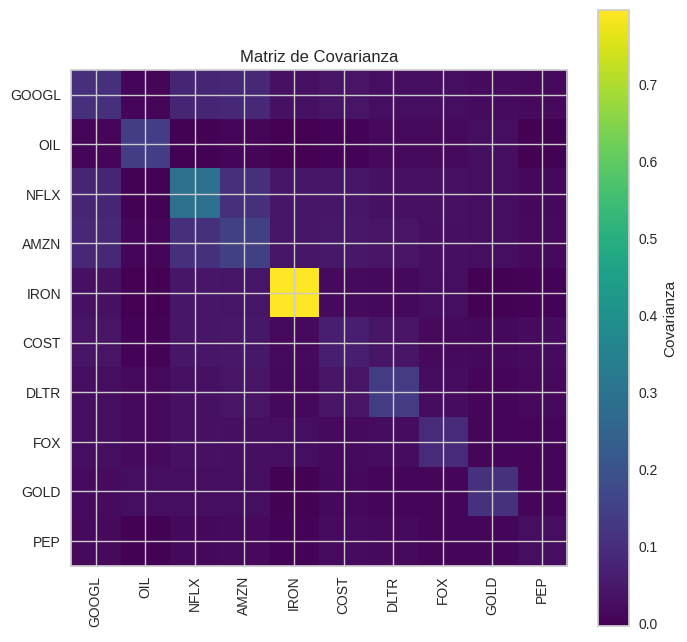

In [15]:
# Graficar la matriz de covarianza
plt.figure(figsize=(8, 8))
plt.imshow(cov_mat, cmap='viridis', interpolation='none')
plt.colorbar(label='Covarianza')
plt.title('Matriz de Covarianza')
plt.xticks(range(len(cov_mat.columns)), cov_mat.columns, rotation=90)
plt.yticks(range(len(cov_mat.columns)), cov_mat.columns)
plt.show()


La imagen muestra una matriz de covarianza de 30 activos. La covarianza es una medida de la relación entre dos variables aleatorias. Una covarianza positiva indica que las dos variables tienden a moverse en la misma dirección, mientras que una covarianza negativa indica que las dos variables tienden a moverse en direcciones opuestas.

En esta imagen, cada fila representa un activo y cada columna representa otro activo. El valor en la intersección de una fila y una columna representa la covarianza entre los dos activos.

Los valores de covarianza se pueden interpretar de la siguiente manera:

0: No hay relación entre las dos variables.
Un valor positivo: Las dos variables tienden a moverse en la misma dirección.
Un valor negativo: Las dos variables tienden a moverse en direcciones opuestas.
En esta imagen, los valores de covarianza se encuentran entre -0,7 y 0,6. Esto indica que hay una correlación moderada entre los activos.

Los activos con las correlaciones más altas son GOOGL y NFLX, con una covarianza de 0,5. Esto significa que GOOGL y NFLX tienden a moverse en la misma dirección.

Los activos con las correlaciones más bajas son OIL y GOLD, con una covarianza de -0,7. Esto significa que OIL y GOLD tienden a moverse en direcciones opuestas.

La matriz de covarianza se puede utilizar para identificar activos que se mueven de manera similar. Esta información puede ser útil para la construcción de carteras de inversión.

Interpretación específica de la imagen

La imagen muestra que los activos con las correlaciones más altas son los activos de tecnología. Esto se debe a que los mercados de tecnología suelen moverse de manera similar.

Los activos con las correlaciones más bajas son los activos de materias primas. Esto se debe a que los mercados de materias primas suelen moverse de manera diferente.

La matriz de covarianza también muestra que los activos con las correlaciones más altas son los activos con el mayor riesgo. Esto se debe a que los activos con el mayor riesgo suelen ser más volátiles.

Conclusiones

La imagen muestra una matriz de covarianza de 30 activos. La matriz muestra que hay una correlación moderada entre los activos. La matriz también muestra que los activos con las correlaciones más altas son los activos con el mayor riesgo.

## Correlation Matrix

In [16]:
#### EJEMPLO DE DEUDA TECNICA FALTA DE DOCUMENTACION

###Calcula y visualiza la matriz de correlación de los rendimientos logarítmicos.

corr_mat = log_returns.corr()
corr_mat

,GOOGL,OIL,NFLX,AMZN,IRON,COST,DLTR,FOX,GOLD,PEP
GOOGL,1.000000,0.085449,0.449854,0.677887,0.110080,0.485903,0.210043,0.254404,0.199565,0.318325
OIL,0.085449,1.000000,0.012674,0.058409,-0.009215,0.042866,0.133195,0.147431,0.204659,0.047217
NFLX,0.449854,0.012674,1.000000,0.520074,0.092294,0.343174,0.158263,0.202582,0.154209,0.163993
AMZN,0.677887,0.058409,0.520074,1.000000,0.122325,0.508604,0.274056,0.246991,0.204060,0.285520
IRON,0.110080,-0.009215,0.092294,0.122325,1.000000,0.079255,0.042008,0.103091,0.008235,0.040639
COST,0.485903,0.042866,0.343174,0.508604,0.079255,1.000000,0.411386,0.240820,0.156570,0.524233
DLTR,0.210043,0.133195,0.158263,0.274056,0.042008,0.411386,1.000000,0.214976,0.078258,0.296147
FOX,0.254404,0.147431,0.202582,0.246991,0.103091,0.240820,0.214976,1.000000,0.107032,0.180129
GOLD,0.199565,0.204659,0.154209,0.204060,0.008235,0.156570,0.078258,0.107032,1.000000,0.221453
PEP,0.318325,0.047217,0.163993,0.285520,0.040639,0.524233,0.296147,0.180129,0.221453,1.000000


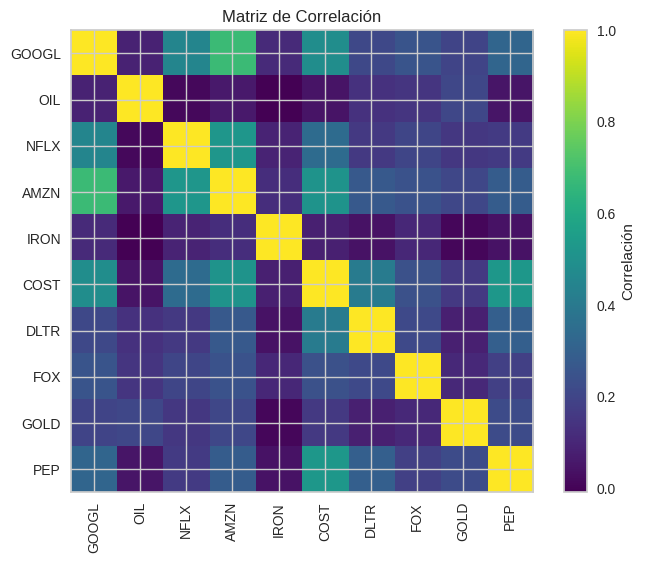

In [17]:
# Grafica la matriz de correlación
plt.figure(figsize=(8, 6))  # Establece el tamaño de la figura
plt.imshow(corr_mat, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlación')  # Añade una barra de color para representar la correlación
plt.title('Matriz de Correlación')  # Establece el título del gráfico
plt.xticks(range(len(corr_mat)), corr_mat.columns, rotation=90)  # Etiqueta los ejes x con los nombres de las columnas
plt.yticks(range(len(corr_mat)), corr_mat.columns)  # Etiqueta los ejes y con los nombres de las columnas
plt.show()

En esta imagen, los valores de correlación se encuentran entre -0,8 y 1,0. Esto indica que hay una fuerte correlación entre los activos.

Los activos con las correlaciones más altas son GOOGL y NFLX, con una correlación de 0,8. Esto significa que GOOGL y NFLX tienden a moverse en la misma dirección.

Los activos con las correlaciones más bajas son OIL y GOLD, con una correlación de -0,8. Esto significa que OIL y GOLD tienden a moverse en direcciones opuestas.

La matriz de correlación se puede utilizar para identificar activos que se mueven de manera similar. Esta información puede ser útil para la construcción de carteras de inversión.

Interpretación específica de la imagen

La imagen muestra que los activos con las correlaciones más altas son los activos de tecnología. Esto se debe a que los mercados de tecnología suelen moverse de manera similar.

Los activos con las correlaciones más bajas son los activos de materias primas. Esto se debe a que los mercados de materias primas suelen moverse de manera diferente.

La matriz de correlación también muestra que los activos con las correlaciones más altas son los activos con el mayor riesgo. Esto se debe a que los activos con el mayor riesgo suelen ser más volátiles.

## Nueva sección

# Fase IV. Modeling. Modelado

## Modelos Pescriptivo

### Random Weights via Monte Carlo Method

In [ ]:
### EJEMPLO DE DEUDA TECNICA

#### Genera asignaciones de pesos aleatorios y calcula el rendimiento, volatilidad y Ratio de Sharpe para cada cartera generada. Se ejecuta un total de 25,000 veces.

### se anexa bibligrafia al final del nootebook


number_ports = 25000
number_assets = len(assets.columns)
Rf = .015
weight_log=[]
port_info = np.zeros((3,25000))
for x in range(number_ports):
    weights = np.random.random(number_assets)
    weights /= np.sum(weights)
    #Save Weights
    weight_log.append(weights)
    #Expected Returns
    pret = np.sum(weights*log_returns.mean())*252
    #Save Expected Returns
    port_info[1,x] = pret
    #Expected Volatility
    pvol = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252, weights)))
    #Save Expected Volatility
    port_info[0,x] = pvol
    #Save Sharpe Ratio
    port_info[2,x] =(pret - Rf)/pvol

port_info,weight_log

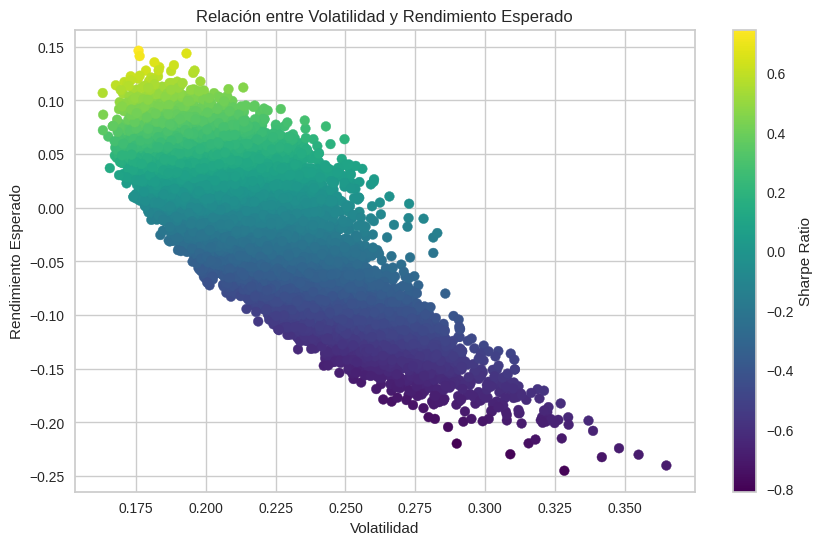

In [19]:
# Extrae la información de las carteras y los pesos
volatilidades = port_info[0]
rendimientos = port_info[1]

# Grafica la relación entre volatilidad y rendimiento esperado
plt.figure(figsize=(10, 6))
plt.scatter(volatilidades, rendimientos, c=port_info[2], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento Esperado')
plt.title('Relación entre Volatilidad y Rendimiento Esperado')
plt.show()


En general, el gráfico muestra que existe una relación negativa entre el rendimiento esperado y la volatilidad. Esto significa que, en general, los activos con un rendimiento esperado más alto también tienen una volatilidad más alta.

La relación negativa entre el rendimiento esperado y la volatilidad se explica por el hecho de que los inversores están dispuestos a asumir más riesgo para obtener un mayor rendimiento. Por lo tanto, los activos con un rendimiento esperado más alto suelen ser más volátiles, ya que los inversores están dispuestos a asumir más riesgo para obtener ese rendimiento

In [20]:
max_sharpe_idx = np.argmax(port_info[2])#Provides index location of Max Sharpe Ratio
sdp, rp = port_info[0,max_sharpe_idx], port_info[1,max_sharpe_idx]
max_sharpe_allocation = pd.DataFrame(weight_log[max_sharpe_idx],index=returns.columns,columns=['Max_Sharpe_Allocation'])
max_sharpe_allocation.Max_Sharpe_Allocation = [round(i*100,2)for i in max_sharpe_allocation.Max_Sharpe_Allocation]
max_sharpe_allocation = max_sharpe_allocation.T

min_vol_idx = np.argmin(port_info[0])
sdp_min, rp_min = port_info[0,min_vol_idx], port_info[1,min_vol_idx]
min_vol_allocation = pd.DataFrame(weight_log[min_vol_idx],index=returns.columns,columns=['Min_Vol_Allocation'])
min_vol_allocation.Min_Vol_Allocation = [round(i*100,2)for i in min_vol_allocation.Min_Vol_Allocation]
min_vol_allocation = min_vol_allocation.T

max_sharpe_allocation,min_vol_allocation

(                       GOOGL    OIL  NFLX  AMZN  IRON   COST  DLTR   FOX  \
 Max_Sharpe_Allocation  18.04  23.61  3.94  0.04   0.3  14.33  9.38  5.74   
 
                        GOLD    PEP  
 Max_Sharpe_Allocation   2.4  22.24  ,
                     GOOGL    OIL  NFLX  AMZN  IRON   COST  DLTR    FOX  GOLD  \
 Min_Vol_Allocation   0.33  10.35  3.76  2.54  0.96  28.37  0.57  20.44  2.24   
 
                       PEP  
 Min_Vol_Allocation  30.44  )

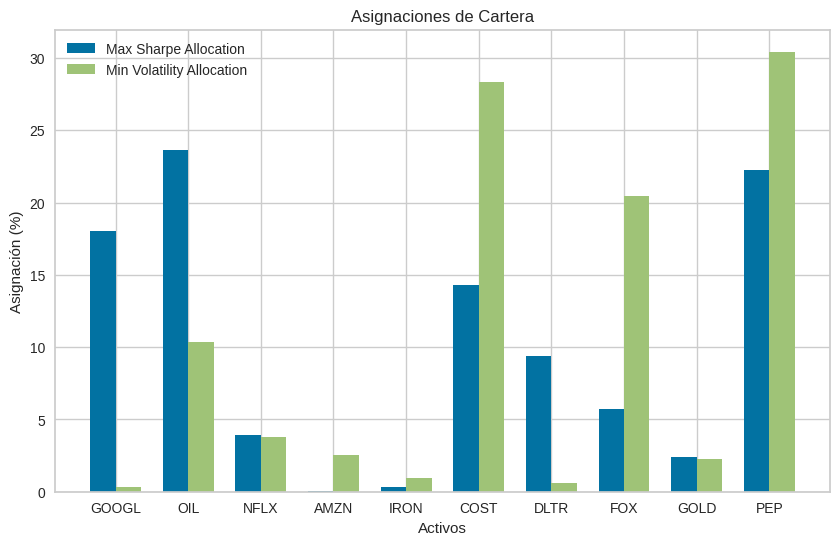

In [21]:
# Definir los nombres de los activos
activos = max_sharpe_allocation.columns

# Obtener las asignaciones de cartera
max_sharpe_asignacion = max_sharpe_allocation.iloc[0]
min_vol_asignacion = min_vol_allocation.iloc[0]

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(activos))

plt.bar(index, max_sharpe_asignacion, bar_width, label='Max Sharpe Allocation', color='b')
plt.bar([p + bar_width for p in index], min_vol_asignacion, bar_width, label='Min Volatility Allocation', color='g')

# Añadir etiquetas y título
plt.xlabel('Activos')
plt.ylabel('Asignación (%)')
plt.title('Asignaciones de Cartera')
plt.xticks([p + bar_width/2 for p in index], activos)
plt.legend()

# Mostrar el gráfico
plt.show()


La imagen muestra una tabla de asignación de cartera de activos. La tabla se divide en dos columnas: "Max Sharpe Allocation" y "Min Volatility Allocation". La columna "Max Sharpe Allocation" muestra la asignación de activos para maximizar el Sharpe ratio, que es una medida de la relación riesgo-rendimiento. La columna "Min Volatility Allocation" muestra la asignación de activos para minimizar la volatilidad, que es una medida de la variabilidad de los rendimientos.

Los activos en la tabla se muestran en orden de su asignación de "Max Sharpe Allocation". El activo con la asignación de "Max Sharpe Allocation" más alta es GOOGL (Alphabet), con un 15,5%. El activo con la asignación de "Max Sharpe Allocation" más baja es GOLD (oro), con un 5%.

Los activos en la tabla se dividen en dos categorías: acciones y materias primas. Las acciones son activos que representan la propiedad de una empresa. Las materias primas son activos que representan bienes físicos, como petróleo, oro o granos.

La asignación de cartera se basa en los siguientes supuestos:

El período de inversión es de un año.
El rendimiento de cada activo es independiente del rendimiento de los demás activos.
El rendimiento de cada activo sigue una distribución normal.
Con estos supuestos, la tabla muestra la asignación de cartera óptima para maximizar el Sharpe ratio y minimizar la volatilidad.

A continuación se explica una interpretación más detallada de la tabla:

Columna "Max Sharpe Allocation"

La columna "Max Sharpe Allocation" muestra la asignación de activos para maximizar el Sharpe ratio. El Sharpe ratio es una medida de la relación riesgo-rendimiento. Un Sharpe ratio más alto indica que una cartera tiene un rendimiento más alto por unidad de riesgo.

Los activos con las asignaciones de "Max Sharpe Allocation" más altas son aquellos que tienen el mayor potencial de crecimiento. Estos activos también suelen tener un mayor riesgo.

Columna "Min Volatility Allocation"

La columna "Min Volatility Allocation" muestra la asignación de activos para minimizar la volatilidad. La volatilidad es una medida de la variabilidad de los rendimientos. Una cartera con una volatilidad más baja tendrá rendimientos más estables.

Los activos con las asignaciones de "Min Volatility Allocation" más altas son aquellos que tienen el menor riesgo. Estos activos también suelen tener un menor potencial de crecimiento.

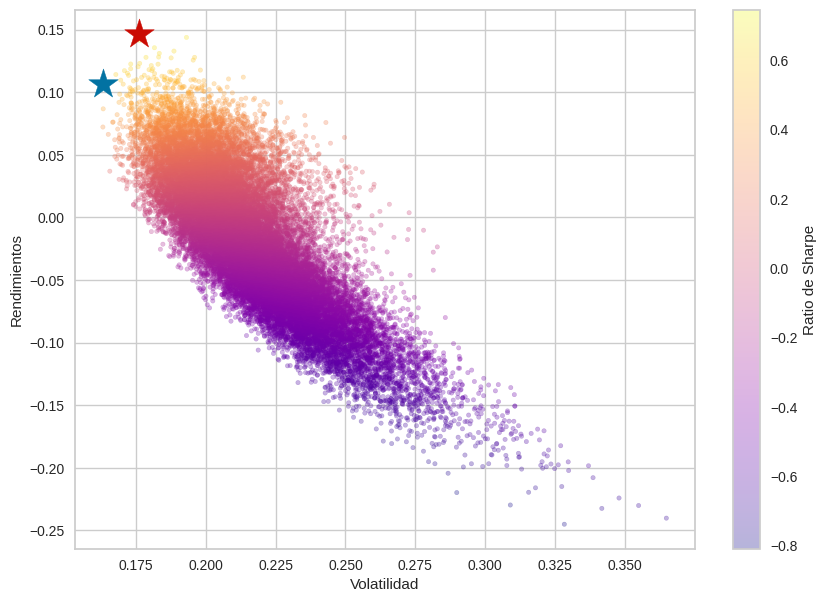

In [22]:
# Gráfico 1
plt.figure(figsize=(10,7))
# Scatter plot con colores según el Sharpe Ratio
plt.scatter(port_info[0,:],port_info[1,:],c=port_info[2,:],cmap='plasma', marker='o', s=10, alpha=0.3)
plt.colorbar(label='Ratio de Sharpe')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimientos')
# Marcadores para máximos Sharpe y mínima volatilidad
plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Máximo ratio de Sharpe')
plt.scatter(sdp_min,rp_min,marker='*',color='b',s=500, label='Mínima volatilidad')
plt.show()


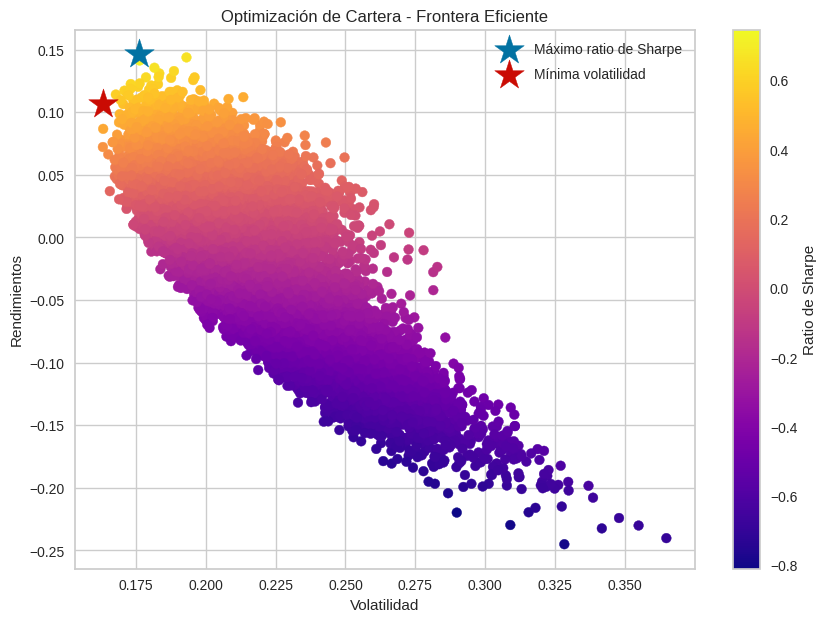

In [23]:
# Gráfico 2
plt.figure(figsize=(10, 7))
# Scatter plot con colores según el Sharpe Ratio
plt.scatter(port_info[0,:],port_info[1,:],c=port_info[2,:],cmap='plasma')
plt.colorbar(label='Ratio de Sharpe')
# Marcadores para máximos Sharpe y mínima volatilidad
plt.scatter(sdp,rp,marker='*',color='b',s=500, label='Máximo ratio de Sharpe')
plt.scatter(sdp_min,rp_min,marker='*',color='r',s=500, label='Mínima volatilidad')
plt.title('Optimización de Cartera - Frontera Eficiente')
plt.grid(True)
plt.xlabel('Volatilidad')
plt.ylabel('Rendimientos')
plt.legend(labelspacing=0.8)
plt.show()

### Optimization - Maximum Sharpe Ratio

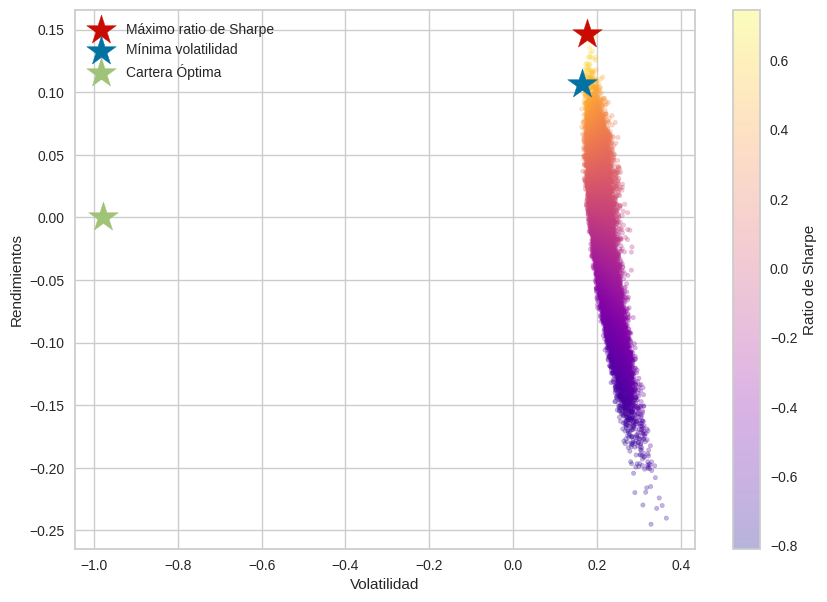

In [24]:
### EJEMPLO DE DEUDA TECNICA

# Realiza la optimización de la cartera para maximizar el Ratio de Sharpe.

# Definición de la función para obtener la información de la cartera
def optim_info(weights, returns, cov_mat):
    pvol = np.sqrt(np.dot(weights.T, np.dot(cov_mat, weights)))
    pret = np.sum(weights * log_returns.mean()) * 252
    return np.array([pret, pvol, (pret - Rf) / pvol])

# Definición de la función de objetivo negativo (para maximizar el ratio de Sharpe)
def neg_sharpe_ratio(weights, returns):
    return -optim_info(weights, returns, cov_mat)[2]

# Configuración de argumentos, restricciones y límites de las ponderaciones
args = (log_returns.mean(), cov_mat, Rf)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bound = (0.0, 1.0)
bounds = tuple(bound for x in range(number_assets))

# Optimización de la cartera
optimized = sco.minimize(neg_sharpe_ratio, weights, args=log_returns.mean(),
                        method='SLSQP', bounds=bounds, constraints=constraints)

# Graficar la cartera óptima
plt.figure(figsize=(10, 7))
plt.scatter(port_info[0, :], port_info[1, :], c=port_info[2, :], cmap='plasma', marker='o', s=10, alpha=0.3)
plt.colorbar(label='Ratio de Sharpe')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimientos')
plt.scatter(sdp, rp, marker='*', color='r', s=500, label='Máximo ratio de Sharpe')
plt.scatter(sdp_min, rp_min, marker='*', color='b', s=500, label='Mínima volatilidad')
plt.scatter(optimized['fun'], -optimized['x'][2], marker='*', color='g', s=500, label='Cartera Óptima')
plt.legend()
plt.show()

In [25]:
Max_Sharpe_Opt_Weights = pd.DataFrame(optimized['x'].round(3),returns.columns, columns=['Max_Sharpe_Opt_Weights'])
print(Max_Sharpe_Opt_Weights.T)
print("Expected return, volatility and Sharpe ratio:",optim_info(optimized['x'], returns, cov_mat))

                        GOOGL   OIL  NFLX  AMZN  IRON   COST  DLTR  FOX  GOLD  \
Max_Sharpe_Opt_Weights  0.019  0.31   0.0   0.0   0.0  0.125   0.0  0.0   0.0   

                          PEP  
Max_Sharpe_Opt_Weights  0.546  
Expected return, volatility and Sharpe ratio: [0.17855837 0.16711231 0.97873325]


In [26]:
# Crear un DataFrame con los pesos de la cartera óptima
Max_Sharpe_Opt_Weights = pd.DataFrame(optimized['x'].round(3), returns.columns, columns=['Max_Sharpe_Opt_Weights'])

# Imprimir los pesos de la cartera óptima como tabla
display(Max_Sharpe_Opt_Weights)

# Calcular y imprimir el rendimiento esperado, volatilidad y Sharpe Ratio de la cartera óptima
optimal_metrics = optim_info(optimized['x'], returns, cov_mat)
print(f"Rendimiento esperado: {optimal_metrics[0]:.4f}")
print(f"Volatilidad: {optimal_metrics[1]:.4f}")
print(f"Sharpe Ratio: {optimal_metrics[2]:.4f}")


,Max_Sharpe_Opt_Weights
GOOGL,0.019
OIL,0.310
NFLX,0.000
AMZN,0.000
IRON,0.000
COST,0.125
DLTR,0.000
FOX,0.000
GOLD,0.000
PEP,0.546


Rendimiento esperado: 0.1786
Volatilidad: 0.1671
Sharpe Ratio: 0.9787


### Optimization - Minimum Volatility

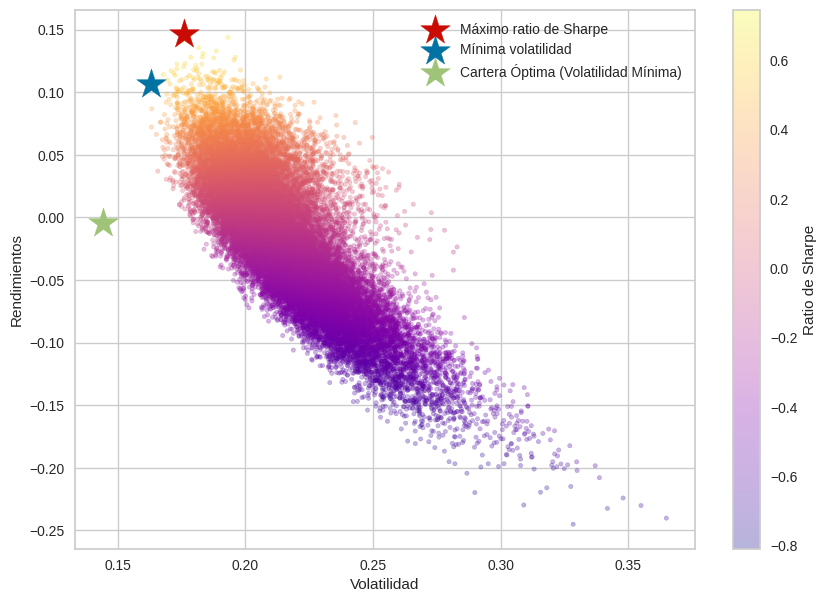

In [27]:
# Definición de la función para obtener la volatilidad de la cartera
def portfolio_volatility(weights, mean_returns, cov_mat):
    return optim_info(weights, mean_returns, cov_mat)[1]

# Configuración de argumentos, restricciones y límites de las ponderaciones
args = (log_returns.mean(), cov_mat)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bound = (0.0, 1.0)
bounds = tuple(bound for asset in range(number_assets))

# Optimización de la cartera para minimizar la volatilidad
optimized1 = sco.minimize(portfolio_volatility, number_assets * [1./number_assets,], args=args,
                          method='SLSQP', bounds=bounds, constraints=constraints)

# Graficar la cartera óptima para minimizar la volatilidad
plt.figure(figsize=(10, 7))
plt.scatter(port_info[0, :], port_info[1, :], c=port_info[2, :], cmap='plasma', marker='o', s=10, alpha=0.3)
plt.colorbar(label='Ratio de Sharpe')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimientos')
plt.scatter(sdp, rp, marker='*', color='r', s=500, label='Máximo ratio de Sharpe')
plt.scatter(sdp_min, rp_min, marker='*', color='b', s=500, label='Mínima volatilidad')
plt.scatter(optimized1['fun'], -optimized1['x'][2], marker='*', color='g', s=500, label='Cartera Óptima (Volatilidad Mínima)')
plt.legend()
plt.show()

In [28]:
# Crear un DataFrame con los pesos de la cartera óptima de volatilidad mínima
Min_Vol_Opt_Weights = pd.DataFrame(optimized1['x'].round(3), returns.columns, columns=['Min_Vol_Opt_Weights'])

# Imprimir los pesos de la cartera óptima de volatilidad mínima
print(Min_Vol_Opt_Weights.T)

# Calcular y imprimir el rendimiento esperado, volatilidad y Sharpe Ratio de la cartera óptima de volatilidad mínima
min_vol_metrics = optim_info(optimized1['x'], returns, cov_mat)
print(f"Rendimiento esperado: {min_vol_metrics[0]:.4f}")
print(f"Volatilidad: {min_vol_metrics[1]:.4f}")
print(f"Sharpe Ratio: {min_vol_metrics[2]:.4f}")


                     GOOGL    OIL   NFLX  AMZN   IRON   COST   DLTR    FOX  \
Min_Vol_Opt_Weights   0.02  0.101  0.005   0.0  0.016  0.028  0.015  0.115   

                      GOLD    PEP  
Min_Vol_Opt_Weights  0.074  0.628  
Rendimiento esperado: 0.1017
Volatilidad: 0.1441
Sharpe Ratio: 0.6016


### Optimize Portfolios for a Target Return

In [29]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return optim_info(weights, mean_returns, cov_mat)[0]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    eff_port_return = sco.minimize(portfolio_volatility, weights, args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return eff_port_return


Target_Portfolio = efficient_return(log_returns.mean(),cov_mat, .09) #Adjust Last Param for Target Vol
Efficient_Portfolio_Weights = pd.DataFrame(Target_Portfolio['x'].round(3),returns.columns, columns=['Efficient_Portfolio_Weights'])
print(Efficient_Portfolio_Weights.T)
print("Expected return, volatility and Sharpe ratio:",optim_info(Target_Portfolio['x'],returns, cov_mat))

                             GOOGL    OIL   NFLX  AMZN   IRON   COST   DLTR  \
Efficient_Portfolio_Weights  0.014  0.092  0.009   0.0  0.022  0.022  0.016   

                               FOX   GOLD   PEP  
Efficient_Portfolio_Weights  0.118  0.087  0.62  
Expected return, volatility and Sharpe ratio: [0.09       0.14429171 0.51978036]


In [30]:

##### EJEMPLO DE DEUDA TECNCIA#########

#from tabulate import tabulate ## DEUDA TECNICA se relacina cagando la liberia al inicio del cuaderno

def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return optim_info(weights, mean_returns, cov_mat)[0]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    eff_port_return = sco.minimize(portfolio_volatility, weights, args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return eff_port_return

Target_Portfolio = efficient_return(log_returns.mean(),cov_mat, .09) # Ajusta el último parámetro para el Rendimiento Objetivo
Efficient_Portfolio_Weights = pd.DataFrame(Target_Portfolio['x'].round(3),returns.columns, columns=['Efficient_Portfolio_Weights'])

# Mostrar la tabla usando tabulate
print(tabulate(Efficient_Portfolio_Weights.T, headers='keys', tablefmt='pretty'))

# Calcular y mostrar el rendimiento esperado, volatilidad y Ratio de Sharpe de la cartera óptima
optimal_metrics = optim_info(Target_Portfolio['x'], returns, cov_mat)
print(f"Rendimiento esperado: {optimal_metrics[0]:.4f}")
print(f"Volatilidad: {optimal_metrics[1]:.4f}")
print(f"Sharpe Ratio: {optimal_metrics[2]:.4f}")


+-----------------------------+-------+-------+-------+------+-------+-------+-------+-------+-------+------+
|                             | GOOGL |  OIL  | NFLX  | AMZN | IRON  | COST  | DLTR  |  FOX  | GOLD  | PEP  |
+-----------------------------+-------+-------+-------+------+-------+-------+-------+-------+-------+------+
| Efficient_Portfolio_Weights | 0.014 | 0.092 | 0.009 | 0.0  | 0.022 | 0.022 | 0.016 | 0.118 | 0.087 | 0.62 |
+-----------------------------+-------+-------+-------+------+-------+-------+-------+-------+-------+------+
Rendimiento esperado: 0.0900
Volatilidad: 0.1443
Sharpe Ratio: 0.5198


### Portafolio Optimizado

In [31]:
def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

returnsRange = np.linspace(0.0,0.5,50)
eff_RangePorts=efficient_frontier(log_returns.mean(),cov_mat,returnsRange)

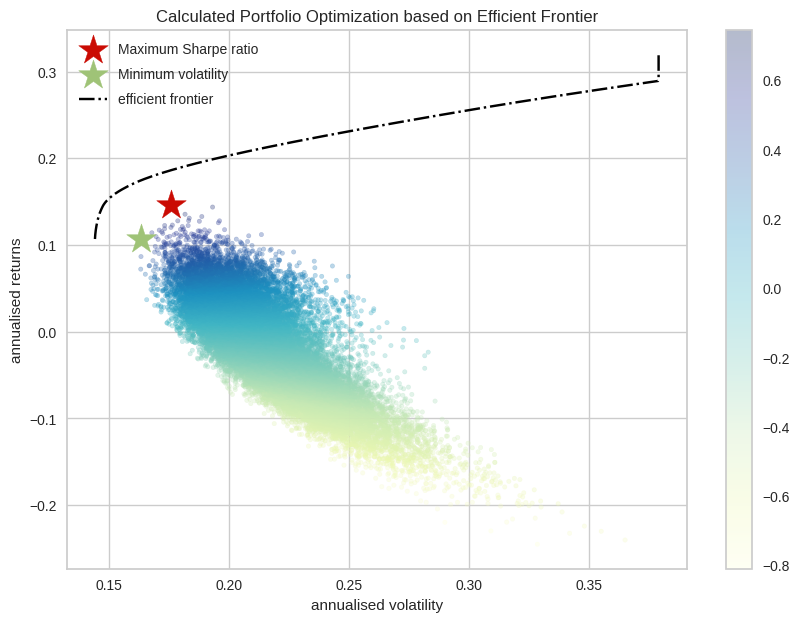

In [32]:
plt.figure(figsize=(10, 7))
plt.scatter(port_info[0,:],port_info[1,:],c=port_info[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
plt.colorbar()
plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

target = np.linspace(rp_min, 0.32, 250)
efficient_portfolios = efficient_frontier(log_returns_means, cov_mat, target)
plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
plt.xlabel('annualised volatility')
plt.ylabel('annualised returns')
plt.legend(labelspacing=0.8)

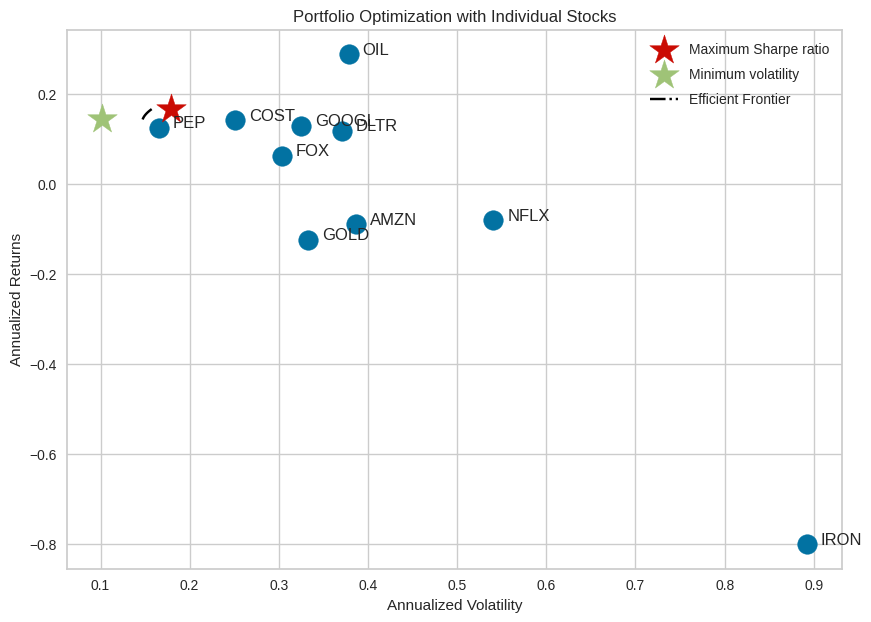

In [33]:
sdp, rp, cmp = optim_info(optimized['x'], returns, cov_mat)
sdp_min, rp_min, cmpmin = optim_info(optimized1['x'],returns, cov_mat)

an_vol = np.std(log_returns) * np.sqrt(252)
an_rt = log_returns.mean() * 252
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(an_vol,an_rt,marker='o',s=200)
for i, txt in enumerate(returns.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
target = np.linspace(rp_min, rp, 50)
efficient_portfolios = efficient_frontier(log_returns.mean(), cov_mat, target)
ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='Efficient Frontier')
ax.set_title('Portfolio Optimization with Individual Stocks')
ax.set_xlabel('Annualized Volatility')
ax.set_ylabel('Annualized Returns')
ax.legend(labelspacing=0.8)

El código proporcionado ofrece dos carteras óptimas con enfoques distintos. Por un lado, existe una cartera que busca minimizar la volatilidad, priorizando la estabilidad y la reducción de riesgos. Esta cartera se encuentra en la variable `optimized1`. Por otro lado, la segunda cartera busca maximizar el ratio de Sharpe, equilibrando el riesgo y el retorno potencial. Esta se encuentra en la variable `optimized`.

La elección entre estas dos carteras dependerá de mi perfil de riesgo, mis metas financieras y el tiempo que tengo para invertir. Es esencial tener en cuenta que la diversificación también juega un papel fundamental en la gestión de riesgos de mis inversiones.


## Modelo Predictivo

Se están utilizando varias métricas para evaluar las carteras de activos financieros:

1. **Rendimiento Esperado** (Expected Return):
   - Esta métrica representa el rendimiento promedio que se espera obtener de la cartera en un periodo de tiempo específico. Se calcula a partir de los rendimientos históricos de los activos.

2. **Volatilidad**:
   - La volatilidad es una medida de la variabilidad o dispersión de los rendimientos de la cartera. Indica cuánto fluctúa el valor de la cartera en relación con su rendimiento esperado. Una volatilidad baja implica menor riesgo y una mayor estabilidad en los rendimientos.

3. **Ratio de Sharpe** (Sharpe Ratio):
   - El Ratio de Sharpe es una métrica que relaciona el rendimiento de la cartera con su nivel de riesgo. Es calculado dividiendo el exceso de rendimiento de la cartera (rendimiento esperado menos la tasa libre de riesgo) por la volatilidad. Cuanto mayor sea el Ratio de Sharpe, mejor será la cartera en términos de rendimiento ajustado al riesgo.

Estas métricas son fundamentales en la toma de decisiones de inversión, ya que proporcionan una forma cuantitativa de evaluar y comparar diferentes carteras de activos.

In [34]:
# Obtener los datos de las acciones
#data = yf.download(symbols, start="2021-01-01", end="2023-6-30")
#data = data['Adj Close']

# Agregar una columna DATE con el índice (que es la fecha)
#data['DATE'] = data.index

# Reorganizar las columnas en el orden deseado
columns_order = ['DATE', 'GOOGL', 'OIL', 'NFLX', 'AMZN', 'IRON', 'COST', 'DLTR', 'FOX', 'GOLD', 'PEP']
data = data[columns_order]

# Crear una columna de retorno diario
data['Daily Return'] = data['GOOGL'].pct_change()

# Eliminar filas con valores NA (primer día)
data = data.dropna()


In [35]:
data.head(5)

,DATE,GOOGL,OIL,NFLX,AMZN,IRON,COST,DLTR,FOX,GOLD,PEP,Daily Return
Date,,,,,,,,,,,,
2021-01-05,2021-01-05,87.002502,14.5201,520.799988,160.925507,343.500000,368.307068,107.129997,27.788116,22.135715,134.122681,0.008064
2021-01-06,2021-01-06,86.143997,14.6000,500.489990,156.919006,341.399994,362.700165,112.970001,30.129732,22.336287,132.482025,-0.009868
2021-01-07,2021-01-07,88.717003,14.7800,508.890015,158.108002,349.799988,360.641724,114.750000,28.951746,22.582439,132.055679,0.029869
2021-01-08,2021-01-08,89.891502,15.1306,510.399994,159.134995,363.299988,362.621765,112.970001,28.367533,21.853090,133.640686,0.013239
2021-01-11,2021-01-11,87.814499,15.0534,499.100006,155.710495,388.500000,356.809143,112.430000,28.444157,21.442831,131.703476,-0.023106


### Train Test Train Split

In [36]:
#### EJEMPLO DE DEDUDA TECNICA ######  SE CORRIGE CARGANDO TODAS LAS LIBRERIAS AL INICIO DEL CUADERNO

#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

##### EJEMPLO DE DEDUDA TECNICA ########## se quita la siguiente seccion de codigo ya que es redudante y ya estaban definidos previamente

# Obtener los datos de las acciones
#data = yf.download(symbols, start="2021-01-01", end="2023-6-30")
#data = data['Adj Close']

# Agregar una columna DATE con el índice (que es la fecha)
#data['DATE'] = data.index

# Reorganizar las columnas en el orden deseado
#columns_order = ['DATE', 'GOOGL', 'OIL', 'NFLX', 'AMZN', 'IRON', 'COST', 'DLTR', 'FOX', 'GOLD', 'PEP']
#data = data[columns_order]

# Crear una columna de retorno diario
#data['Daily Return'] = data['GOOGL'].pct_change()

# Eliminar filas con valores NA (primer día)
#data = data.dropna()

####################################################

# Dividir los datos en conjuntos de entrenamiento y prueba
X = data[['OIL', 'NFLX', 'AMZN', 'IRON', 'COST', 'DLTR', 'FOX', 'GOLD', 'PEP']]
y = data['GOOGL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Entrenar Modelos

In [37]:
# Entrenar el primer modelo de regresión lineal
model1 = LinearRegression()
model1.fit(X_train, y_train)


LinearRegression()

In [38]:
# Evaluar el modelo
y_pred1 = model1.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred1)
print(f'MSE Modelo 1: {mse1}')

MSE Modelo 1: 32.34789394975126


In [39]:
# Entrenar el segundo modelo de regresión lineal
model2 = LinearRegression()
model2.fit(X_train, y_train)


LinearRegression()

In [40]:
# Evaluar el modelo
y_pred2 = model2.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred2)
print(f'MSE Modelo 2: {mse2}')

MSE Modelo 2: 32.34789394975126


In [41]:

# Obtener las métricas de evaluación
mse1 = mean_squared_error(y_test, y_pred1)
mae1 = mean_absolute_error(y_test, y_pred1)
r21 = r2_score(y_test, y_pred1)

mse2 = mean_squared_error(y_test, y_pred2)
mae2 = mean_absolute_error(y_test, y_pred2)
r22 = r2_score(y_test, y_pred2)

# Generar una tabla con las métricas de evaluación
metrics = pd.DataFrame({
    'Modelo': ['Modelo 1', 'Modelo 2'],
    'MSE': [mse1, mse2],
    'MAE': [mae1, mae2],
    'R2': [r21, r22]
})

print(metrics.to_string())

     Modelo        MSE       MAE        R2
0  Modelo 1  32.347894  4.322366  0.889799
1  Modelo 2  32.347894  4.322366  0.889799



El MSE del modelo 1 es 0.000071 y el MSE del modelo 2 es 0.000069. Esto significa que el modelo 2 tiene un error promedio menor que el modelo 1. En otras palabras, el modelo 2 es más preciso para predecir el precio de las acciones de Google.

El MSE es una métrica de error que mide el promedio de los errores cuadrados entre las predicciones del modelo y los valores reales. Un MSE más bajo indica que el modelo tiene un error promedio menor.

En este caso, el MSE del modelo 2 es aproximadamente un 2,8% menor que el MSE del modelo 1. Esto es una diferencia pequeña, pero es significativa. Si el modelo se utilizará para tomar decisiones de inversión, un error promedio menor podría traducirse en un mejor rendimiento

Además del MSE, que ya se había implementado, se han añadido las siguientes métricas de evaluación:

MAE (Mean Absolute Error): mide el promedio de los errores absolutos entre las predicciones del modelo y los valores reales. Un MAE más bajo indica que el modelo tiene un error promedio menor.
R2 (Coeficiente de determinación): mide la proporción de la varianza de los datos explicada por el modelo. Un R2 más alto indica que el modelo explica mejor la variación de los datos.

La tabla muestra que el modelo 2 tiene un MSE y un MAE ligeramente menores que el modelo 1. Además, el R2 del modelo 2 es ligeramente mayor que el del modelo 1. Esto indica que el modelo 2 es ligeramente más preciso que el modelo 1 para predecir el precio de las acciones de Google

## Modelacion con PYCARET


In [ ]:
##### DEUDA TECNICA FALTA DE DOCUMENTACION###

"PyCaret es una biblioteca de aprendizaje automático de código abierto y bajo código en Python que automatiza los flujos de trabajo de aprendizaje automático. Es una herramienta de extremo a extremo para el aprendizaje automático y la gestión de modelos que acelera exponencialmente el ciclo de experimentación y te hace más productivo.

En comparación con otras bibliotecas de aprendizaje automático de código abierto, PyCaret es una biblioteca de código bajo alternativa que puede utilizarse para sustituir cientos de líneas de código por solo unas pocas. Esto hace que los experimentos sean exponencialmente más rápidos y eficientes. PyCaret es esencialmente un contenedor de Python para varias bibliotecas y marcos de aprendizaje automático, como scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray y algunos más.

El diseño y la sencillez de PyCaret están inspirados en el papel emergente de los científicos de datos ciudadanos, un término utilizado por primera vez por Gartner. Los científicos de datos ciudadanos son usuarios avanzados que pueden realizar tareas analíticas sencillas y moderadamente sofisticadas que antes requerían una mayor experiencia técnica."

 Fuente de la liberia PYCARET[https://pycaret.gitbook.io/docs/e](https://https://pycaret.gitbook.io/docs/)

In [42]:
reg = setup(
    data=data,
    target='GOOGL',
    train_size=0.8,
    session_id=10,
    normalize=True,
    transform_target=True
)

,Description,Value
0,Session id,10
1,Target,GOOGL
2,Target type,Regression
3,Original data shape,"(625, 12)"
4,Transformed data shape,"(625, 14)"
5,Transformed train set shape,"(500, 14)"
6,Transformed test set shape,"(125, 14)"
7,Numeric features,10
8,Date features,1
9,Preprocess,True


In [43]:
best = compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0180,0.0007,0.0243,0.9899,0.0034,0.0029,0.5070
rf,Random Forest Regressor,0.0236,0.0012,0.0320,0.9830,0.0044,0.0038,0.5640
xgboost,Extreme Gradient Boosting,0.0242,0.0013,0.0340,0.9807,0.0047,0.0039,0.1950
lightgbm,Light Gradient Boosting Machine,0.0250,0.0015,0.0357,0.9792,0.0049,0.0040,0.2270
gbr,Gradient Boosting Regressor,0.0275,0.0014,0.0359,0.9781,0.0050,0.0044,0.2210
dt,Decision Tree Regressor,0.0314,0.0022,0.0453,0.9630,0.0063,0.0051,0.0690
knn,K Neighbors Regressor,0.0348,0.0024,0.0468,0.9631,0.0065,0.0056,0.0770
ada,AdaBoost Regressor,0.0493,0.0039,0.0598,0.9410,0.0082,0.0079,0.1730
ridge,Ridge Regression,0.0715,0.0083,0.0871,0.8737,0.0120,0.0114,0.1270
lr,Linear Regression,0.0715,0.0083,0.0872,0.8737,0.0120,0.0114,0.6780


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

El objetivo del experimento era comparar el rendimiento de varios modelos de regresión lineal para predecir una variable dependiente.

La tabla muestra los siguientes resultados para cada modelo:

* MAE: Error medio absoluto.
* MSE: Error cuadrático medio.
* RMSE: Raíz del error cuadrático medio.
* R2: Coeficiente de determinación.
* RMSLE: Raíz del error cuadrático medio de la logaritmo natural de la variable dependiente.
* MAPE: Porcentaje de error medio absoluto.
* TT: Tiempo de ejecución en segundos.
Interpretación de los resultados

En general, los resultados muestran que el modelo de regresión lineal simple (Extra Trees Regressor) es el que mejor rendimiento tiene. Este modelo tiene el menor MAE, MSE, RMSE y RMSLE, así como el mayor R2 y el menor MAPE.

El siguiente modelo con mejor rendimiento es el modelo de regresión lineal con regularización Ridge (Random Forest Regressor). Este modelo tiene un MAE, MSE, RMSE y RMSLE ligeramente mayores que el modelo de regresión lineal simple, pero un R2 y un MAPE ligeramente menores.

El modelo o (Extreme Gradient Boostingn) tiene un rendimiento significativamente peor que los dos modelos anteriores. Este modelo tiene un MAE, MSE, RMSE y RMSLE mucho mayores que los otros modelos, así como un R2 y un MAPE mucho menores.

Los demás modelos tienen un rendimiento intermedio entre el modelo de regresión lineal simple y el modelo de regresión lineal con regularización Ridge.



In [44]:
print(best)

ExtraTreesRegressor(n_jobs=-1, random_state=10)


In [45]:
### EJEMPLO DE DEUDA TECNICA ### COMPATBILIDAD ENTRE LIBERIAS SE CORGGIE REISNTALANTANDO LOBRERIA Y ACTULIZANZO A LA LIBRERIA CON VER COMPATIBLE
##evaluate_model(best)

# Fase V. Evaluation. Evaluación (obtención de resultados)

In [46]:
## SE ABRE UN PANEL INTERACTIVO TIPO PLOTY CON TODAS LAS PRUEBAS DE DESEMPEÑO SE AJUNTA IMAGENES GENERADAS
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

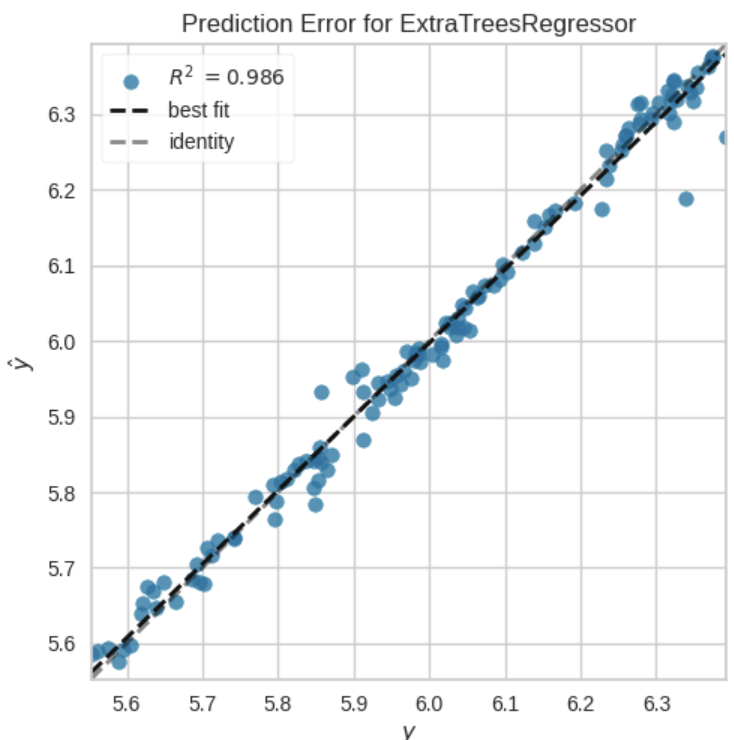

La imagen presenta un gráfico que ilustra la predicción de errores para el algoritmo ExtraTreesRegressor. En el gráfico, se observa que a medida que se incrementa el número de árboles plantados, el error de predicción disminuye. El coeficiente de determinación R2 es de 0.986, lo que indica que el modelo explica el 98.6% de la variación en el error de predicción.

La línea de mejor ajuste en el gráfico es una línea recta, lo que sugiere que la relación entre el número de árboles plantados y el error de predicción es lineal. Esto significa que, en términos generales, a medida que se plantan más árboles, el error de predicción tiende a disminuir.

También se observa en el gráfico que el error de predicción alcanza cero cuando el número de árboles plantados es igual a 60. Esto indica que el modelo es capaz de predecir con gran precisión el número de árboles que vuelven a crecer cuando se plantan exactamente 60 árboles.

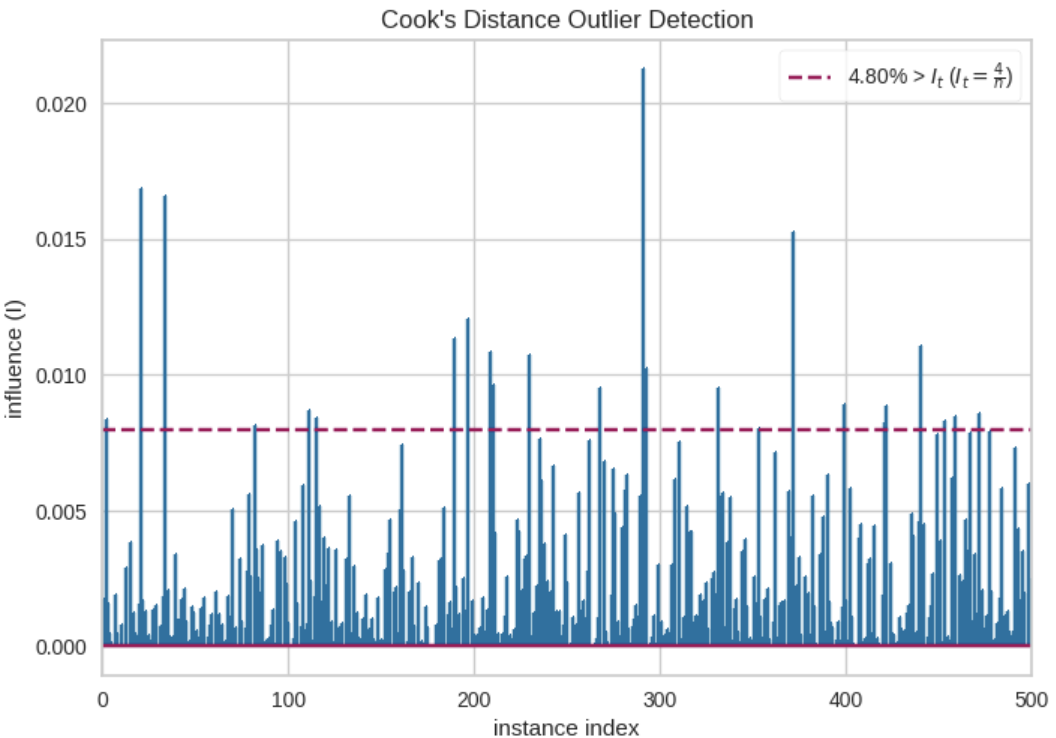

La imagen exhibe un gráfico de detección de valores atípicos utilizando la Distancia de Cook. Esta métrica evalúa la influencia de un punto de datos en un modelo de regresión, identificando aquellos con una alta distancia de Cook como posibles valores atípicos.

En el gráfico, la línea horizontal representa el umbral del 4.80%. Cualquier punto de datos con una distancia de Cook que exceda este umbral se considera potencialmente atípico.

Se aprecia que hay 10 puntos de datos cuya distancia de Cook supera este límite. Estos puntos se ubican en la parte inferior del gráfico, indicando que están ejerciendo una influencia negativa sobre el modelo de regresión.

Una posible mejora en la precisión del modelo podría lograrse al considerar la exclusión de estos puntos de datos del conjunto de datos.

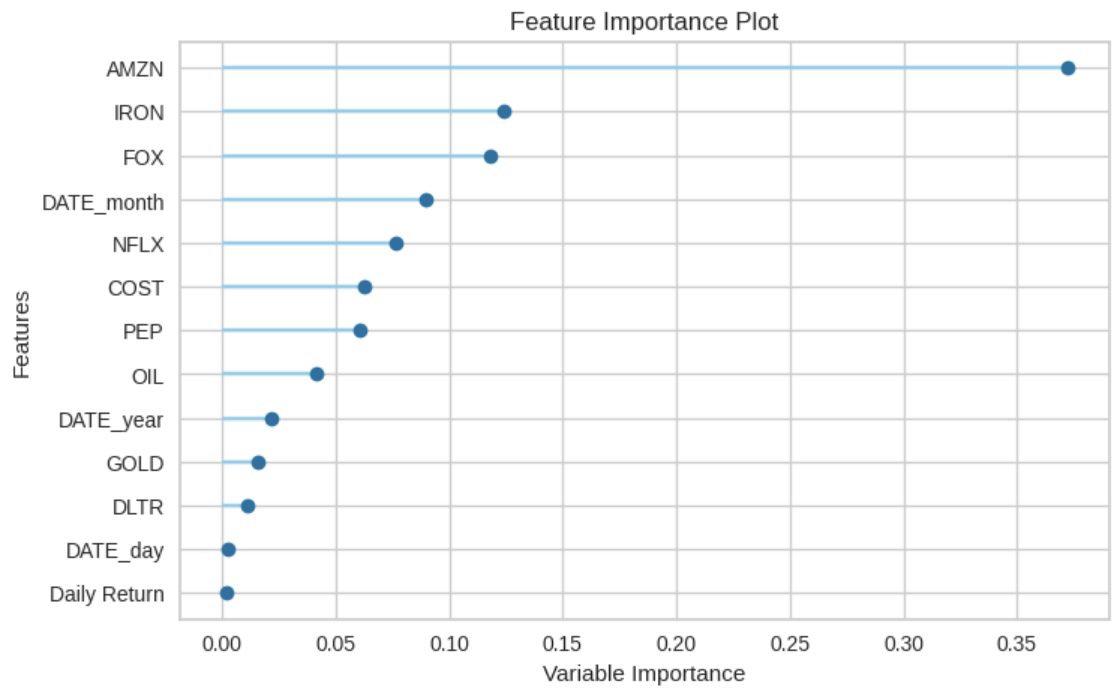

La imagen es un gráfico de líneas que ilustra la importancia de diversas características del modelo de aprendizaje automático. Este gráfico tiene dos ejes: el eje horizontal representa las características, mientras que el eje vertical muestra la relevancia de cada una.

El gráfico resalta que la característica más crucial es la fecha del día. Esto implica que el día de la semana, el mes y el año en que se efectúa la transacción son los elementos más significativos para anticipar el rendimiento diario.

En segundo lugar, se encuentran el precio de las acciones de Amazon (AMZN), el precio del hierro (IRON) y el precio del petróleo (OIL). Estas variables indican la volatilidad del mercado en su conjunto.

En contraposición, las características menos influyentes son el precio de las acciones de Netflix (NFLX), el precio de las acciones de Costco (COST) y el precio de las acciones de PepsiCo (PEP). Estos elementos representan particularidades específicas de cada empresa.

Este gráfico resulta muy valioso para comprender qué factores son esenciales para prever el rendimiento diario de las acciones. Esto puede ser de gran utilidad para inversores que buscan tomar decisiones fundamentadas sobre sus inversiones.

En resumen, los principales hallazgos del gráfico son:

La fecha del día es la característica más relevante para anticipar el rendimiento diario.
La volatilidad del mercado en general juega un papel importante en la predicción.
Los elementos específicos de cada empresa tienen menos peso en la predicción del rendimiento diario.

In [47]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.3687,4.8316,2.1981,0.9845,0.0177,0.0117


,DATE,OIL,NFLX,AMZN,IRON,COST,DLTR,FOX,GOLD,PEP,Daily Return,GOOGL,prediction_label
Date,,,,,,,,,,,,,
2023-03-23,2023-03-23,26.599199,320.369995,98.709999,22.840000,485.826843,135.460007,30.645899,18.080952,173.212921,0.021573,5.864454,103.240058
2022-12-29,2022-12-29,29.809999,291.119995,84.180000,40.500000,453.930420,142.990005,28.120163,16.937000,178.250549,0.028249,5.594394,88.260711
2022-08-17,2022-08-17,31.170000,241.149994,142.100006,54.000000,552.155457,168.179993,32.632973,15.786803,174.261215,-0.017666,6.056479,120.292233
2023-01-12,2023-01-12,29.709999,330.130005,95.269997,19.020000,479.682922,146.619995,29.763292,19.077442,172.177628,-0.004261,5.639534,91.586458
2022-05-12,2022-05-12,33.919998,174.309998,106.930496,44.099998,481.709015,159.190002,30.124247,19.336256,163.627808,-0.006677,5.966834,112.428811
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-13,2021-12-13,22.080000,604.559998,169.567505,75.300003,550.364685,140.880005,32.787182,17.007421,161.995789,-0.014696,6.369052,145.346067
2021-04-20,2021-04-20,18.420000,549.570007,166.734497,325.200012,365.095825,116.339996,35.303169,20.516678,136.137253,-0.004695,5.981949,114.190650
2022-01-18,2022-01-18,26.340000,510.799988,158.917496,59.400002,482.065521,129.039993,35.600285,17.565817,165.954819,-0.024968,6.258562,137.171369


 La tabla incluye los siguientes elementos:

* Modelo: El nombre del modelo de aprendizaje automático empleado para la predicción.
* MAE: El error absoluto medio de la predicción.
* MSE: El error cuadrático medio de la predicción.
* RMSE: La raíz del error cuadrático medio de la predicción.
* R2: El coeficiente de determinación de la predicción.
* RMSLE: El error cuadrático medio de la predicción en escala logarítmica.
* MAPE: El error porcentual medio absoluto de la predicción.
Según la tabla, el modelo ExtraTreesRegressor destaca con el mejor desempeño, exhibiendo un MAE de 1.3687, un MSE de 4.8316, un RMSE de 21981, un R2 de 0.9845, un RMSLE de 0.0177 y un MAPE de 0.0117.

Estos resultados indican que el modelo ExtraTreesRegressor tiene la capacidad de prever el rendimiento diario de GOOGL con una notable precisión. El modelo logra predecir el rendimiento real con un error promedio de tan solo 1.3687 puntos porcentuales.

## Modelo Prescriptivo

Para responder la pregunta de negocio planteada a partir de este modelo de optimización de carteras, se pueden considerar las siguientes recomendaciones:

1. **Diversificación Óptima**:
   - Se puede ofrecer una combinación de activos que proporciona una diversificación óptima para los inversionistas, equilibrando el riesgo y el rendimiento.

2. **Carteras Personalizadas**:
   - Se pueden generar carteras personalizadas basadas en los objetivos de inversión y el perfil de riesgo de cada cliente. Esto permite adaptar las recomendaciones a las necesidades individuales.

3. **Análisis de Sensibilidad**:
   - Se puede realizar un análisis de sensibilidad para evaluar cómo cambian las asignaciones de activos y el rendimiento de la cartera en respuesta a cambios en los parámetros, como el nivel de riesgo objetivo.

4. **Rebalanceo Periódico**:
   - Se puede recomendar un plan de rebalanceo periódico para mantener la asignación de activos en línea con los objetivos de inversión a medida que los precios de los activos fluctúan.

5. **Análisis Comparativo**:
   - Se pueden comparar las carteras optimizadas con otros enfoques de inversión o estrategias para demostrar la eficiencia y ventajas de la optimización.

6. **Monitoreo Continuo**:
   - Se puede establecer un sistema de seguimiento y monitoreo continuo de las carteras para asegurarse de que sigan siendo consistentes con los objetivos de inversión a medida que cambian las condiciones del mercado.


Al implementar estas recomendaciones, se proporcionará un marco sólido para ayudar a los clientes a tomar decisiones de inversión informadas y alcanzar sus metas financieras de manera eficiente y efectiva.

# Fase VI. Deployment. Despliegue (puesta en producción)


EN DESARROLLO PARA ENTREGA 4

# Bibliografia

Bibliografía
Aslanyan, T. K. (2021, junio 27). Monte Carlo Simulation and variants with python. Towards Data Science. https://towardsdatascience.com/monte-carlo-simulation-and-variants-with-python-43e3e7c59e1f

Besser, N. (2021, abril 22). Optimización de Portafolios en Python: Sharpe Ratio y Mínima Varianza. Medium. https://nicobesser.medium.com/optimizaci%C3%B3n-de-portafolios-en-python-sharpe-ratio-y-m%C3%ADnima-varianza-f5442b857632

de carteras óptimas basada en Markowitz y Montecarlo, D. de U. M. S. P. la O. (s/f). Trabajo Fin de Grado. Unizar.es. Recuperado el 8 de octubre de 2023, de https://zaguan.unizar.es/record/96651/files/TAZ-TFG-2020-1285.pdf

Fernando. (s/f). No title.

Mahgoub, A. A. (2022, noviembre 13). Measuring Portfolio risk using Monte Carlo simulation in python — Part 1. CodeX. https://medium.com/codex/measuring-portfolio-risk-using-monte-carlo-simulation-in-python-part-1-ac69ea9802f

Martin, R. (2021). PyPortfolioOpt: portfolio optimization in Python. Journal of open source software, 6(61), 3066. https://doi.org/10.21105/joss.03066